# **Fully-Connected (Dense) Neural Networks** 

## Table of Contents
- [Theory](#theory)
    - [Fully-connected Neural Networks](#fc_l)
    - [Activation Functions](#act)
    - [Optimizers](#opts)
    - [Losses](#loss)
    - [Training Flow](#clsf)
- [Python](#python)
- [PyTorch](#torch)
- [Bulding and Training NNs](#btnn)
    - [The XOR problem](#xor)
    - [CIFAR-10 Classification](#cifar10)
    - [Speech Commands Classification](#speech)
- [Homework](#homework)

## **Theory** <a class="anchor" id="theory"></a>

### Fully-connected Neural Networks <a class="anchor" id="fc_l"></a>

A **fully-connected neural network**, also known as a **dense neural network** or **multi-layer perceptron (MLP)**, is a fundamental type of artificial neural network. It is composed of layers of interconnected nodes, where each node in one layer is connected to every node in the next layer. The basic building block of a fully-connected neural network is the **fully-connected layer**.

#### Fully-Connected Layer

A fully-connected layer can be viewed as a function $f: \mathbb{R}^{N_{\text{in}}} \rightarrow \mathbb{R}^{N_{\text{out}}}$ parametrized by a matrix $ \mathbf{W} \in \mathbb{R}^{N_{\text{out}} \times N_{\text{in}}}$ and vector $ b \in \mathbb{R}^{N_{\text{out}}}$.


Mathematically, the output $ y \in \mathbb{R}^{N_{\text{out}}}$ of a fully-connected layer, given input vector $x \in \mathbb{R}^{N_{\text{in}}}$, can be expressed as: 

$$ y = f(x) = \mathbf{W}x + b $$

<div style="text-align: center;">
  <img src="imgs/fcl.png" alt="description" width="600"/>
  <figcaption>Diagram of a fully-connected layer</figcaption>
</div>

The weight matrix ($ \mathbf{W} $) encapsulates the connections between neurons in the current layer and the next layer. Each element $ w_{ij} $ in ($ \mathbf{W} $) corresponds to the weight of the connection between the $j^{th}$ neuron in the current layer and the $i^{th}$ neuron in the next layer.

The bias vector ( $b$ ) is added to the weighted sum to introduce an offset, allowing the model to learn translations, while also helping in handling non-zero inputs and enhancing expressiveness.

### Activation Functions <a class="anchor" id="act"></a>

Activation functions play a crucial role in neural networks by introducing non-linearities to the model. These non-linearities enable neural networks to learn and represent complex relationships in data.

Some common activation functions:

- **Sigmoid (Logistic) Function**: $$ \sigma(x) = {{1} \over {1 + e^{-x}}}, \,\, \sigma: \mathbb{R} \rightarrow \mathbb [0, 1] $$ Commonly used in the output layer of binary classification models. Vanishing gradient problems in deep networks.

- **Hyperbolic Tangent (tanh)**: $$ \sigma(x) = {{e^x - e^{-x}} \over {e^x + e^{-x}}}, \,\, \sigma: \mathbb{R} \rightarrow \mathbb [-1, 1] $$ Outputs values in the range (-1, 1). Similar to the sigmoid but with a symmetric range. May help mitigate issues related to vanishing gradients.

- **Rectified Linear Unit (ReLU)**: $$ \sigma(x) = \max(0, x), \,\, \sigma: \mathbb{R} \rightarrow \mathbb [0, \infty] $$ Addresses the vanishing gradient problem compared to traditional sigmoid and tanh. Widely used due to its simplicity, effectiveness and computational efficiency, along with its other variants: Leaky ReLU, PReLU, ELU, etc.

- **Softmax**: for a vector $z = (z_1, \dots, z_n)$, the outputs $y = (y_1, \dots, y_n)$ are defined as follows: $$ y_i = {{e^{z_i}} \over {\sum_{j=1}^n e^{z_j}}}, \,\, y_i \in [0, 1], \,\,\sum_{i=1}^n y_i = 1$$ 

The *Softmax* is mostly used as a final processing applied on the output vector to transform its contents into a *[discrete probability distribution](https://en.wikipedia.org/wiki/Probability_mass_function)*, in classification tasks, or to compute weighting values in the *[attention mechanism](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)*.

### Neural Network Structure <a class="anchor" id="act"></a>

The function computed by a multi-layer fully-connected neural network with $m$ layers, represented by fully connected operators $ \{f_i\}_{i=1}^{m} $ and non-linear activation operators $ \{\sigma_i\}_{i=1}^{m-1} $, can be written as:

$$ T(x) = (f_m \circ \sigma_{m-1} \circ f_{m-1} \circ \dots \circ \sigma_1 \circ f_1 ) (x)$$ 
which represents an alternation between linear and non-linear operations.

**For $\sigma = I_d = diag([1, \dots, 1])$, the above function can be reduced to a single fully-connected layer $\rightarrow$ therefore a single linear layer is equivalent with multiple stacked linear layers.**

### Optimizers <a class="anchor" id="opts"></a>

Optimization in neural networks refers to the process of adjusting the model's parameters during training to minimize some "error" function, taylored for the task at hand. The objective is to find the optimal set of weights and biases that allow the neural network to make accurate predictions on unseen data. The most common class of optimization algorithms are *gradient-based methods*.

**Stochastic Gradient Descent (SGD)** is a fundamental optimization algorithm widely used for training neural networks. It operates by iteratively updating the model parameters based on the gradients of the loss with respect to those parameters. 

```python
def sgd(loss, start_point, learning_rate, n_iterations):
    current_point = start_point
    # iteratively refine the optimum estimate    
    for i in range(n_iterations):
        # set the function to the current estimated optimum
        loss.update(current_point)
        # compute gradient of function w.r.t the current point
        current_gradient = loss.gradient(current_point)
        # update current optimum estimate
        current_point = current_point - learning_rate * current_gradient

    return current_point
```

In the above, the gradient w.r.t. to the input point is used to follow the direction of descent (or ascent, based on the `sign`). In the neural network case, the input data is fixed, and we're trying to find those weights and biases which best fit to our data. Therefore, we are learning the **input-output** function that minimizes the `loss`, given the desired input and output variables.

Some notable optimization algorithms, other than SGD, are: [Adam](https://arxiv.org/pdf/1412.6980.pdf%5D), [RMSprop](https://www.cs.toronto.edu/~hinton/coursera/lecture6/lec6.pdf), [LBFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS), [Nadam](https://cs229.stanford.edu/proj2015/054_report.pdf)

There are also algorithms that try to optimize the model's hyperparameters (e.g. number of layers, number of neurons): [Hyperband](https://www.jmlr.org/papers/volume18/16-558/16-558.pdf), [Progressive NAS](http://openaccess.thecvf.com/content_ECCV_2018/papers/Chenxi_Liu_Progressive_Neural_Architecture_ECCV_2018_paper.pdf) 

### Loss (Error/Cost) Functions <a class="anchor" id="loss"></a>

Loss functions quantify the difference between predicted values and actual target values during the training of machine learning models. Different tasks and model types require specific loss functions.

Given $N$ target outputs $\{y_i\}_{i=1}^N$ and predicted outputs $\{\hat{y_i}\}_{i=1}^m$, some common error functions are:

- Root Mean Squared Error (RMSE) - regression loss function used when predicting continuous values:
  $$\text{RMSE} = \frac{1}{N} \sum_{i=1}^{N} ||y_i - \hat{y_i}||_2$$
  here $y_i$ and $\hat{y_i}$ could be vectors of any dimension.
  
- Hinge Loss - commonly used in Support Vector Machines (SVMs) for binary classification, it penalizes misclassified samples linearly and encourages correct classification with a margin:
  $$\text{HingeLoss} = \sum_{i=1}^{N} \max(0, 1 - y_i \cdot \hat{y_i})$$
  For binary classification, $y_i$ and $\hat{y_i}$ are scalars in $[-1, 1]$
- Cross-Entropy Loss - commonly used in multiclass-classification problems, it measures the performance of a classification model whose output is a discrete probability vector over all possible classes:
  $$\text{CrossEntropyLoss} = -\sum_{i=1}^{N} \sum_{c=1}^C y_i[c] \log(\hat{y_i}[c])$$
  In this context, $y_i \in \mathbb{R}^C$ is a *one-hot* vector with a single entry of 1 and 0 elsewhere, and $\hat{y_i[c]}$ represents the probability assigned by the neural network for the $i^{th}$ input example to be of class $c$.

In general, the cost will be parametrized as $L(W, b, X, Y)$, for some dataset $(X, Y)$ and network parameters $W = \{W_i\}_{i=1}^m, b=\{b_i\}_{i=1}^m$.

### Training Flow <a class="anchor" id="clsf"></a>

Given a neural network built by a sequence of linear layers ${f_i}_{i=1}^m$, and a dataset with input features $X \in \mathbb{R}^{N \times D}$ ($N$ data vectors, with $D$ elements) and corresponding targets $Y$, the goal is to minimize a chosen loss function $L(W, b, X, Y)$.

1. **Initialization:**
   - Initialize the weights $W_k$ and biases $b_k$ of each layer $f_k$.
2. **Forward Pass:**
   - For each input $x_i$ (or batch of inputs $B = \{x_j\}_{j=1}^{\text{batch size}}$) in the dataset:
     - Compute the predicted output $y_i$ using the current weights and biases.
       $$y_i = f_m \circ \sigma_{m-1} \circ f_{m-1} \circ \dots \circ \sigma_1 \circ f_1 (x_i)$$
     - Calculate the loss $L$ between the predicted outputs and the actual targets:
       $$L(W, b, X, Y) = \frac{1}{N} \sum_{i=1}^{N} \text{loss}(y_i, y_i^{\text{true}})$$
       where $\text{loss}$ is the chosen error function (e.g., mean squared error, cross-entropy).
     - Compute the gradient of the loss with respect to the weights and biases using the chain rule:
       $$\frac{\partial L}{\partial W_i} = \frac{\partial L}{\partial f_m} \frac{\partial f_m}{\partial \sigma_{m-1}} \dots \frac{\partial \sigma_i}{\partial f_i} \frac{\partial f_i}{\partial W_i}, \forall i \in \{1, \dots, m-1\} \,\, (\text{similar for} \, b_i)$$
     - Update the weights and biases in the opposite direction of the gradients to minimize the loss:
       $$W_i \leftarrow W_i - \alpha \frac{\partial L}{\partial W_i}; \, b_i \leftarrow b_i - \alpha \frac{\partial L}{\partial b_i}$$
       where $\alpha$ is the learning rate.	

3. **Repeat:** for a number of epochs $E$, or until some stopping criterion is achieved. 

## **Python** <a class="anchor" id="python"></a>

Python is a high-level, versatile programming language widely used in various domains, including data science and artificial intelligence. Its simplicity, readability, and extensive community support make it an excellent choice for beginners. In the context of out lab, Python will be the primary language for implementing and experimenting with neural networks.

**Python Packages** extend the core functionality of Python and provide specialized tools for various tasks. To import a package, you typically use the import keyword followed by the name of the package:
```python
import numpy as np
from utils import CustomFC
```

In the above example, `np` is an alias for `NumPy`. It's a common convention to use short and recognizable aliases to make the code more concise. We can install packages right here using the following:

In [81]:
!pip install matplotlib

### **Resources for learning Python**:
- [Python for Everybody](https://www.py4e.com/)
- [Introduction to Computer Science and Programming Using Python](https://www.edx.org/learn/computer-science/massachusetts-institute-of-technology-introduction-to-computer-science-and-programming-using-python)
- [Codeacademy Python 3](https://www.codecademy.com/learn/learn-python-3)
- [CS231n Python Tutorial With Google Colab](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb#scrollTo=dzNng6vCL9eP)

## **PyTorch - Basics** <a class="anchor" id="torch"></a>

PyTorch is an open-source deep learning library developed by Facebook's AI Research lab ([FAIR](https://ai.meta.com/research/)). It is widely used for building and training neural networks. Some key features are:
- Tensor Computation - efficient and accelerated numerical computations using *multi-dimensional arrays*
- Automatic Differentiation - computation of gradients during training, less error-prone
- Eager Execution - operations are executed immediately as they are called, allowing for interactive development

Official Docs: [PyTorch 2.1](https://pytorch.org/docs/stable/index.html). To look for a specific version that will work with your CUDA/cuDNN, search [here](https://pytorch.org/get-started/previous-versions/).

### Basic Tensor Operations

<div style="text-align: center;">
  <img src="imgs/tensors.jpg" alt="description" />
  <figcaption><a href="https://kindsonthegenius.com/blog/simple-explanation-of-tensors-1-an-introduction/">Reference</a></figcaption>
</div>

A m-dimensional tensor is the mathematical object defined as $X \in \mathbb{R}^{N_1 \times N_2 \times \dots \times N_m}$, where $N_i \in \mathbb{N}^*$ represents the number of elements in the $i^{th}$ dimension. For example, an RGB image would be represented as a 3D tensor $X \in \mathbb{R}^{H \times W \times 3}$, where the first 2 dimensions represent the spatial width and height, while the last corresponds to the number of color channels.

##### Creating empty tensors:

In [82]:
import torch

x = torch.empty(3)
print("1D tensor: \n", x)

x = torch.empty(3, 2)
print("2D tensor: \n", x)

x = torch.empty(3, 2, 4)
print("3D tensor: \n", x)

1D tensor: 
 tensor([6.7262e-44, 0.0000e+00, 6.7262e-44])
2D tensor: 
 tensor([[3.8340e-33, 0.0000e+00],
        [3.8339e-33, 0.0000e+00],
        [8.9683e-44, 0.0000e+00]])
3D tensor: 
 tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00]]])


##### Creating valued tensors:

In [83]:
import numpy as np

print("First valued tensor:")
x = torch.Tensor(
    [[1, 2, 3],
     [4, 5, 6]]
)
print(x)

print("Second valued tensor:")
random_values = np.random.uniform(-3, 3, (2, 5))
x = torch.from_numpy(random_values)
print(x)

First valued tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
Second valued tensor:
tensor([[-2.3584,  0.1680,  0.4534, -1.2781, -0.5740],
        [ 2.4613, -2.6377, -2.0315,  2.4071, -1.9242]], dtype=torch.float64)


##### Element-wise Operations:

In [84]:
x = torch.Tensor(
    [[1, 2, 3],
     [4, 5, 6]]
)

add = x + 3
mul = x * 4
pow = x ** 2

print("Element-wise addition: ")
print(add)
print("Element-wise multiplication: ")
print(mul)
print("Pow:")
print(pow)

Element-wise addition: 
tensor([[4., 5., 6.],
        [7., 8., 9.]])
Element-wise multiplication: 
tensor([[ 4.,  8., 12.],
        [16., 20., 24.]])
Pow:
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])


##### Matrix operations:

In [85]:
matrix_a = torch.tensor([[1, 2], [3, 4]])
matrix_b = torch.tensor([[5, 6], [7, 8]])
result_matrix_mul_1 = torch.mm(matrix_a, matrix_b)
result_matrix_mul_2 = matrix_a @ matrix_b
result_matrix_add = matrix_a + matrix_b

print("Mul: \n", result_matrix_mul_1, "\n", result_matrix_mul_2)
print("Add: \n", result_matrix_add)

Mul: 
 tensor([[19, 22],
        [43, 50]]) 
 tensor([[19, 22],
        [43, 50]])
Add: 
 tensor([[ 6,  8],
        [10, 12]])


In [86]:
matrix_a = torch.ones(3, 4, 5)
matrix_b = torch.ones(3, 5, 6)

torch.bmm(matrix_a, matrix_b).shape

torch.Size([3, 4, 6])

##### Reshaping Tensors:

In [87]:
original_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float)
reshaped_tensor_1 = original_tensor.view(3, 2)
reshaped_tensor_2 = original_tensor.view(1, 6)

print(reshaped_tensor_1, reshaped_tensor_1.shape)
print(reshaped_tensor_2.squeeze(), reshaped_tensor_2.squeeze().shape)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]]) torch.Size([3, 2])
tensor([1., 2., 3., 4., 5., 6.]) torch.Size([6])


##### Reduction Operations:

In [88]:
# Sum along a dimension
sum_tensor = original_tensor.sum(dim=1)  # 1 - index of dimension to perform operations onto

# Mean along a dimension
mean_tensor = original_tensor.mean(dim=0)

# Max along a dimension
max_tensor = original_tensor.max(dim=1)

std_tensor = original_tensor.std(dim=1)

print("Sum: \n", sum_tensor)
print("Mean: \n", mean_tensor)
print("Max: \n", max_tensor)
print(std_tensor)

Sum: 
 tensor([ 6., 15.])
Mean: 
 tensor([2.5000, 3.5000, 4.5000])
Max: 
 torch.return_types.max(
values=tensor([3., 6.]),
indices=tensor([2, 2]))
tensor([1., 1.])


##### Indexing and Slicing:

In [89]:
original_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float)

element = original_tensor[1, 2] 
more_elements = original_tensor[..., :2]

print("1 element: ", element)
print("Sliced elements: \n", more_elements)

1 element:  tensor(6.)
Sliced elements: 
 tensor([[1., 2.],
        [4., 5.]])


##### Concatenation:

In [90]:
matrix_a = torch.tensor([[1, 1], [2, 2]])
matrix_b = torch.tensor([[3, 3], [4, 4]])

concat_rows = torch.cat([matrix_a, matrix_b], dim=0)
concat_cols = torch.cat([matrix_a, matrix_b], dim=1)

print("Row concatenation: \n", concat_rows)
print("Column concatenation: \n", concat_cols)

Row concatenation: 
 tensor([[1, 1],
        [2, 2],
        [3, 3],
        [4, 4]])
Column concatenation: 
 tensor([[1, 1, 3, 3],
        [2, 2, 4, 4]])


##### Tensor Broadcasting

In [91]:
matrix_a = torch.tensor([[1, 2, 3], [4, 5, 6]])
vector_b = torch.tensor([10, 20, 30])
result = matrix_a + vector_b
print(result)

tensor_c = torch.tensor([[10], [20]])
print(tensor_c)
result = matrix_a + tensor_c
print(result)

tensor([[11, 22, 33],
        [14, 25, 36]])
tensor([[10],
        [20]])
tensor([[11, 12, 13],
        [24, 25, 26]])


##### Gradient Tracking

The autograd functionality in PyTorch is responsible for automatic differentiation, keeping track of operations performed on a tensor during a series of operations, in order to be able to compute the gradients with respect to some specified function.

In [92]:
x_1 = torch.tensor([2.0], requires_grad=True)
x_2 = torch.tensor([1.0], requires_grad=True)

y = 3 * x_2**3 + x_1**2 + x_1 - 5
print("Output: ", y)
# compute gradients
y.backward()

# Try to get gradients
try:
    grads_x1 = x_1.grad
    assert grads_x1 is not None
    print("Got gradients for x_1: ", grads_x1)
except:
    print("Didn't get gradients for x_1.")

try:
    grads_x2 = x_2.grad
    assert grads_x2 is not None
    print("Got gradients for x_2: ", grads_x2)
except:
    print("Didn't get gradients for x_2.")

Output:  tensor([4.], grad_fn=<SubBackward0>)
Got gradients for x_1:  tensor([5.])
Got gradients for x_2:  tensor([9.])


**What if we add some non-derivable operation over one or both variables (e.g. rounding) ?**

#### <u>Exercise: Autograd</u>

Given the dot product of two vectors $<x, w> = \sum_{i=1}^N x_{i} w_{i}$, where $N$ is the vector dimension, find the vector $w$ such that $\sigma(<x, w>) = y$, with $y \in [0, 1)$ being an imposed target value, and $\sigma$ the Sigmoid function. Check out the Optimizers section for SGD. In order to modify something without the gradients to accumulate you'll need to place them in the following context manager:
```python
    with torch.no_grad():
        # some operations for which you want do disable gradient computation
        ...
        # end of operations
        w.grad.zero_()  # Zero the gradients, such that the following iteration starts fresh
```

Note: you'll need to loop your computation for a number of steps. You can observe the "error" at each iteration and check if it's decreasing.

In [93]:
import torch

torch.manual_seed(33)  # Set seed for reproducibility
N = 16
n_steps = 20
learning_rate = 0.5

# template
y = torch.rand(1)
x = torch.randn(N, requires_grad=False)
w = torch.randn(N, requires_grad=True)

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: define some loss function; iteratively refine w s.t. the error is decreasing
def loss(x, w, y):
    scalar_prod = torch.sum(x * w)
    scalar_prod = torch.sigmoid(scalar_prod)

    # return (scalar_prod - y)**2
    return torch.abs(scalar_prod - y)


for _ in range(n_steps):
    error = loss(x, w, y)

    # Compute gradients
    error.backward()
    #
    grads_w = w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
        w.grad.zero_()  # Zero the gradients
    
    print(loss(x, w, y))    
# ***************************************************

tensor([0.5991], grad_fn=<AbsBackward0>)
tensor([0.5969], grad_fn=<AbsBackward0>)
tensor([0.5941], grad_fn=<AbsBackward0>)
tensor([0.5906], grad_fn=<AbsBackward0>)
tensor([0.5860], grad_fn=<AbsBackward0>)
tensor([0.5798], grad_fn=<AbsBackward0>)
tensor([0.5709], grad_fn=<AbsBackward0>)
tensor([0.5576], grad_fn=<AbsBackward0>)
tensor([0.5357], grad_fn=<AbsBackward0>)
tensor([0.4958], grad_fn=<AbsBackward0>)
tensor([0.4122], grad_fn=<AbsBackward0>)
tensor([0.2183], grad_fn=<AbsBackward0>)
tensor([0.1079], grad_fn=<AbsBackward0>)
tensor([0.1601], grad_fn=<AbsBackward0>)
tensor([0.1607], grad_fn=<AbsBackward0>)
tensor([0.0509], grad_fn=<AbsBackward0>)
tensor([0.2249], grad_fn=<AbsBackward0>)
tensor([0.0974], grad_fn=<AbsBackward0>)
tensor([0.1795], grad_fn=<AbsBackward0>)
tensor([0.1449], grad_fn=<AbsBackward0>)


---
# **Building and Training NNs** <a class="anchor" id="btnn"></a>

## The XOR Problem <a class="anchor" id="xor"></a>

The XOR classification problem is a classic binary classification task that involves learning a decision boundary to separate two classes based on their input features. The challenge in the XOR problem arises because a simple linear decision boundary (a straight line) cannot effectively separate the classes.

<div style="text-align: center;">
<table border="1" style="margin-left:auto; margin-right:auto; border-collapse: collapse;">
<thead>
<tr>
<th style="text-align:center"><strong>b0</strong></th>
<th style="text-align:center"><strong>b1</strong></th>
<th style="text-align:center"><strong>out</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">0</td>
<td style="text-align:center">0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td style="text-align:center">0</td>
<td style="text-align:center">1</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td style="text-align:center">1</td>
<td style="text-align:center">0</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td style="text-align:center">1</td>
<td style="text-align:center">1</td>
<td style="text-align:center">0</td>
</tr>
</tbody>
</table>
</div>


In [94]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import sys
sys.path.append("BIOSINF_IA2/L1/")

from utils import create_xor_dataset

(800, 2) (800,)


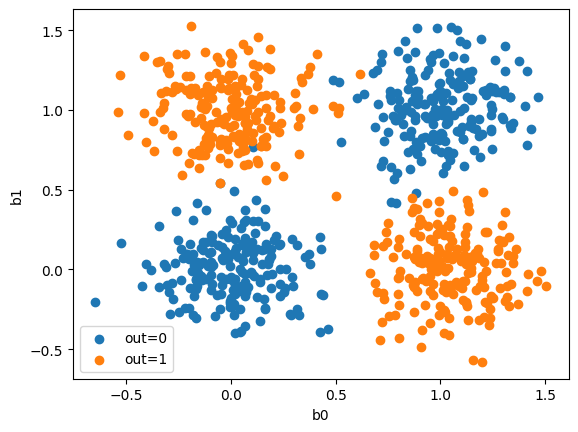

In [95]:
X, y = create_xor_dataset(num_samples_per_class=200, noise=0.2)

x0 = X[y == 0, :]
x1 = X[y == 1, :]

print(X.shape, y.shape)

plt.figure()
plt.scatter(x0[:, 0], x0[:, 1], label="out=0")
plt.scatter(x1[:, 0], x1[:, 1], label="out=1")
plt.xlabel("b0")
plt.ylabel("b1")
plt.legend()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(640, 2) (160, 2) (640,) (160,)
(array([0., 1.]), array([313, 327]))
(array([0., 1.]), array([87, 73]))


### Datasets & Dataloaders

In PyTorch, `datasets` and `dataloaders` are integral components for efficiently managing and loading data during the training and evaluation of machine learning models. A dataset in PyTorch is essentially a container for your data, and a dataloader is responsible for efficiently iterating over the dataset in batches during training.

In [97]:
from torch.utils.data import TensorDataset, Dataset, DataLoader

train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
test_dataset = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))

print("Train/Test elements: ", len(train_dataset), len(test_dataset))

Train/Test elements:  640 160


In [98]:
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # shuffle=True -> randomizes the ordering of elements after each epoch
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [99]:
for i, batch in enumerate(test_loader):
    xi, yi = batch
    print(f"Batch {i}: ", xi.shape, yi.shape)

Batch 0:  torch.Size([64, 2]) torch.Size([64])
Batch 1:  torch.Size([64, 2]) torch.Size([64])
Batch 2:  torch.Size([32, 2]) torch.Size([32])


Custom datasets in PyTorch offer the flexibility to handle diverse data formats, apply specific data manipulations, and seamlessly integrate domain-specific features.

In [100]:
class CustomDataset(Dataset):
    def __init__(self, features, labels, transform=None):
        self.features = torch.FloatTensor(features)
        self.labels = torch.LongTensor(labels)
        self.transform = transform

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        x = self.features[index] 
        y = self.labels[index]

        sample = (x, y)

        if self.transform:
            sample = self.transform(sample)

        return sample

In the above, the `CustomDataset` class is a subclass of `Dataset`, containing inputs `X` and outputs `y`. The `__getitem__` method in CustomDataset retrieves a sample, and the custom transformation is applied.

In [101]:
class CustomTransform:
    def __init__(self, coeff=-0.5, bias=1):
        self.coeff = coeff
        self.bias = bias

    def __call__(self, sample):
        x, y = sample
        
        x_ = x * self.coeff + self.bias
        y_ = nn.functional.one_hot(y, num_classes=2)

        return (x_, y_)

custom_test_dataset = CustomDataset(X_test, y_test, transform=CustomTransform())
custom_test_dataloader = DataLoader(custom_test_dataset, batch_size=batch_size, shuffle=True)

batch = next(iter(custom_test_dataloader))
xi, yi = batch

print(xi.shape, yi.shape)
print(np.unique(xi))

torch.Size([64, 2]) torch.Size([64, 2])
[0.25070006 0.26806706 0.35288298 0.3644362  0.39468473 0.39774293
 0.40274453 0.429969   0.43068945 0.4379328  0.43921036 0.44302326
 0.44563997 0.44771647 0.45711833 0.45804673 0.4606682  0.46114212
 0.47174203 0.47517794 0.48394263 0.48664594 0.48718953 0.48804194
 0.48843253 0.48957992 0.49038792 0.49647367 0.4971255  0.49969542
 0.50494635 0.51209486 0.51440877 0.515247   0.5167122  0.5193659
 0.5209324  0.5297563  0.53203475 0.5362441  0.53714406 0.54776573
 0.5546859  0.583095   0.5939336  0.5973069  0.59783727 0.5988591
 0.5989628  0.60041404 0.6141689  0.6279577  0.63828    0.6660961
 0.6702584  0.7279831  0.7560248  0.7809544  0.7810197  0.78468174
 0.8035275  0.81032073 0.8448848  0.85343516 0.8558727  0.8624293
 0.87215483 0.9036624  0.9059229  0.9130394  0.917794   0.93251806
 0.93675923 0.9413143  0.95522916 0.9575834  0.9587219  0.95917475
 0.96563816 0.970388   0.9738945  0.9755033  0.98041546 0.9813391
 0.9815366  0.9818134  0.99

### Defining a Neural Network architecture

In PyTorch, constructing models begins with defining a custom class that inherits from `nn.Module`. This class encapsulates the architecture by incorporating various layers, which can be either pre-defined PyTorch modules, like `nn.Linear`, or custom layers (see `CustomLinear` from `customs.py`). The `__init__` method of the class is used to initialize these layers, setting parameters such as input and output sizes. The core computation occurs in the `forward` method, where the forward pass through the network is specified, including the sequence of layers and any activation functions. 

In [102]:
from customs import CustomLinear

class FFN_linear(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, use_custom=False):
        super(FFN_linear, self).__init__()

        if use_custom:
            linear_layer = lambda input_size, output_size: CustomLinear(input_size, output_size)
        else:
            linear_layer = lambda input_size, output_size: nn.Linear(input_size, output_size)

        self.fc1 = linear_layer(input_size, hidden_size)
        self.fc2 = linear_layer(hidden_size, hidden_size)
        self.fc3 = linear_layer(hidden_size, output_size)

    def forward(self, x):
        # Forward pass without activation functions
        # Input data looks like this (batch_size, number_of_features)
        h = self.fc1(x)
        h = self.fc2(h)
        y = self.fc3(h)

        return y

**Observation**: we'll not be using Softmax after the final layer! PyTorch's *torch.nn.CrossEntropyLoss()* expects *unnormalized* output vectors

### Defining the Training/Validation Step

In [119]:
from tqdm import tqdm

def step(model, dataloader, optimizer, loss_fn, is_training=True, device='cuda'):
    # Set the model to training mode if it's a training step, otherwise to evaluation mode
    model.train() if is_training else model.eval()

    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in tqdm(dataloader, position=0, leave=True):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        if is_training:
            outputs = model(inputs)
        else:
            with torch.no_grad():
                outputs = model(inputs)

        # Calculate loss if it's a training step
        loss = loss_fn(outputs, labels) 

        # Backward pass and optimization if it's a training step
        if is_training:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        # Cumulative loss for reporting
        total_loss += loss.item()

    # Calculate average loss and accuracy
    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / total_samples if total_samples > 0 else None

    return avg_loss, accuracy

### Training Loop

Set the training hyperparameters:

In [120]:
### Architecture-related hyperparams
input_size = 2
hidden_size = 16
output_size = 2
use_custom = False

### Training-related hyperparams
epochs = 15
learning_rate = 1e-3
print_frequency = 15

Define model, optimizer and loss:

In [121]:
model = FFN_linear(input_size, hidden_size, output_size, use_custom=use_custom)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss = nn.CrossEntropyLoss()

We'll use the standard categorical-crossentropy loss for multi-class problems.

<u>Question</u>: What should you change in order to be able to use Binary-Crossentropy?

In [124]:
for e in range(1, epochs + 1):
    train_loss, train_acc = step(model, train_loader, optimizer, loss, device="cpu")

    if e % print_frequency == 0:
        with torch.no_grad():
            test_loss, test_acc = step(model, test_loader, optimizer, loss, is_training=False, device="cpu")
        print(f"Epoch {e}/{epochs}: train_loss={train_loss} train_acc={train_acc} test_loss={test_loss} test_acc={test_acc}")

100%|██████████| 3/3 [00:00<00:00, 719.15it/s]

Epoch 15/15: train_loss=0.6928571283817291 train_acc=0.5046875 test_loss=0.6973813772201538 test_acc=0.45625


### Visualizing Decision Boundaries

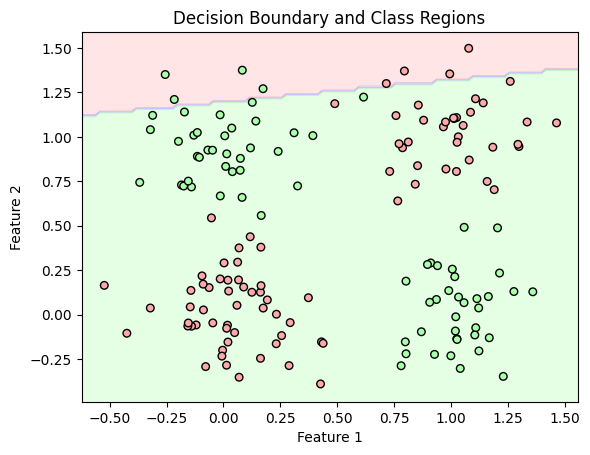

In [125]:
import utils
import importlib
importlib.reload(utils)
from utils import plot_decision_boundary

plot_decision_boundary(model, test_loader)

Why does this happen?

Adding some non-linearity between the fully-connected layers:

In [126]:
class FFN_non_linear(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, use_custom=False):
        super(FFN_non_linear, self).__init__()

        self.activation = nn.ReLU()
        if use_custom:
            linear_layer = lambda input_size, output_size: CustomLinear(input_size, output_size)
        else:
            linear_layer = lambda input_size, output_size: nn.Linear(input_size, output_size)

        self.fc1 = linear_layer(input_size, hidden_size)
        self.fc2 = linear_layer(hidden_size, hidden_size)
        self.fc3 = linear_layer(hidden_size, output_size)

    def forward(self, x):
        h = self.fc1(x)
        h = self.activation(h)
        h = self.fc2(h)
        h = self.activation(h)
        y = self.fc3(h)
        
        return y

In [127]:
model = FFN_non_linear(input_size, hidden_size, output_size, use_custom=use_custom)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss = nn.CrossEntropyLoss()

for e in range(1, epochs + 1):
    train_loss, train_acc = step(model, train_loader, optimizer, loss, device="cpu")

    if e % print_frequency == 0:
        test_loss, test_acc = step(model, test_loader, optimizer, loss, is_training=False, device="cpu")
        print(f"Epoch {e}/{epochs}: train_loss={train_loss} train_acc={train_acc} test_loss={test_loss} test_acc={test_acc}")

100%|██████████| 3/3 [00:00<00:00, 680.97it/s]

Epoch 15/15: train_loss=0.48412594497203826 train_acc=0.8953125 test_loss=0.4977608521779378 test_acc=0.85


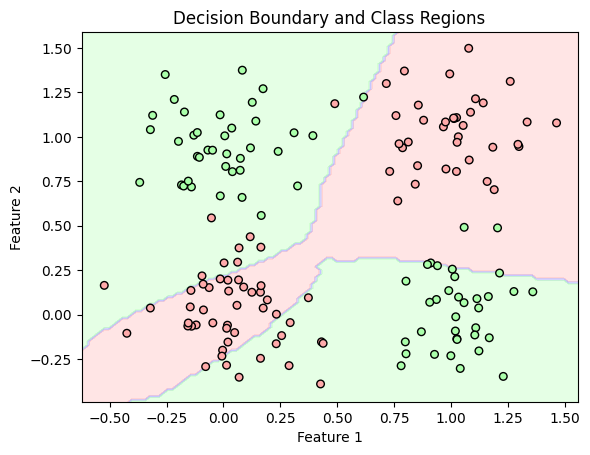

In [128]:
plot_decision_boundary(model, test_loader)

#### <u>Exercise: Play with activations</u> 
Check, for different activations, how the shape of the decision boundary changes, and draw some conclusions based on that.

---
## CIFAR-10 classification <a class="anchor" id="cifar10"></a>

In [111]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

transform = transforms.Compose([
    # transforms.Resize((16, 16)),
    # transforms.Grayscale(),
    transforms.ToTensor(), 
    # transforms.Normalize(),
])

cifar10_train = CIFAR10(root='./torch_data', train=True, download=True, transform=transform)
cifar10_test = CIFAR10(root='./torch_data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [112]:
print("Train images: ", len(cifar10_train))
print("Test images: ", len(cifar10_test))
image, label = cifar10_train[0]
print("Image size: ", image.shape)
print(f"Pixel range: [{image.min()}, {image.max()}]")
print("Label to index mapping: ", cifar10_train.class_to_idx)

Train images:  50000
Test images:  10000
Image size:  torch.Size([3, 32, 32])
Pixel range: [0.0, 1.0]
Label to index mapping:  {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


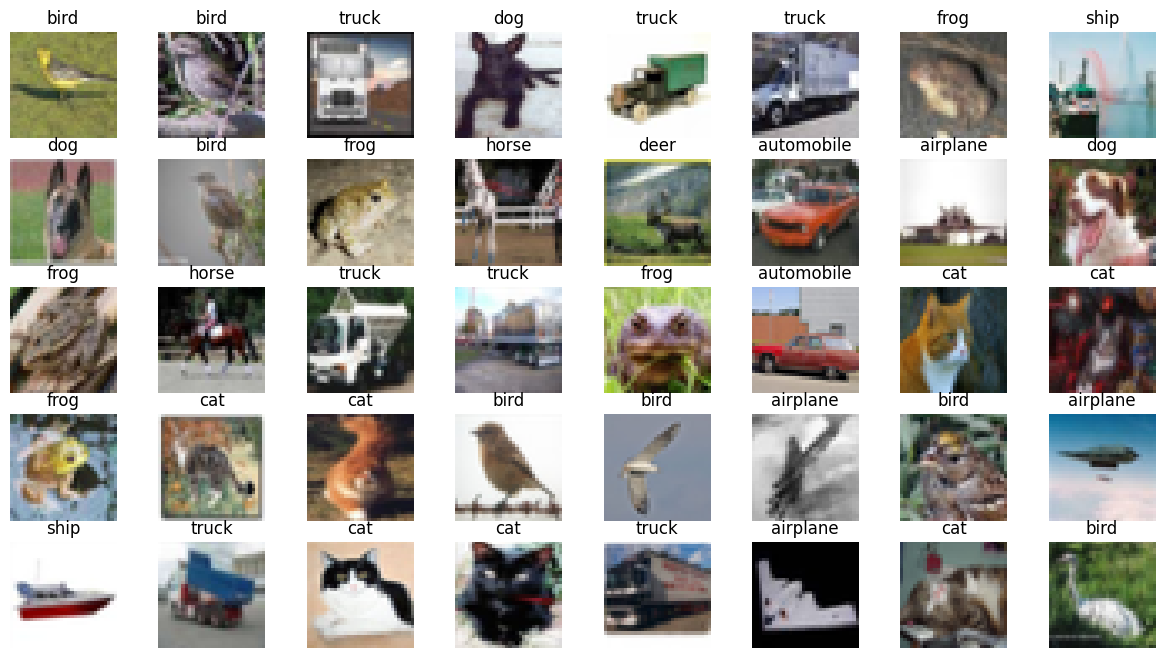

In [113]:
import importlib
import BIOSINF_IA2.L1.utils as utils
importlib.reload(utils)
from utils import plot_random_images

plot_random_images(cifar10_train, rows=5, columns=8)

In [80]:
from torch.utils.data import DataLoader

batch_size = 256

cifar10_train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
cifar10_test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

print("Number of train batches: ", len(cifar10_train_loader))
print("Number of test batches: ", len(cifar10_test_loader))

Number of train batches:  196
Number of test batches:  40


We'll define an arbitrary-sized (depth & width) fully-connected network:

In [114]:
import torch.nn as nn

class GenericFCNN(nn.Module):
    def __init__(self, 
                 input_size, 
                 output_size, 
                 hidden_sizes=[], 
                 activation_fn=nn.ReLU(),
                 input_flatten=True,
                 *args, **kwargs):
        super(GenericFCNN, self).__init__(*args, **kwargs)

        if input_flatten:
            ### Important for when our dataset returns fully-sized images (c, h, w)
            self.input_transform = nn.Flatten(start_dim=1)
        else:
            self.input_transform = nn.Identity()
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_sizes = hidden_sizes
        self.activation_fn = activation_fn

        if isinstance(hidden_sizes, int):
            self.hidden_sizes = [hidden_sizes]
        
        modules = []
        in_size = self.input_size
        for i in range(len(self.hidden_sizes)):
            modules.append(nn.Linear(in_size, self.hidden_sizes[i]))
            modules.append(activation_fn)

            in_size = self.hidden_sizes[i]

        out = nn.Linear(self.hidden_sizes[-1], output_size)
        modules.append(out)
        
        self.network = nn.Sequential(*modules)

    def forward(self, x):
        x = self.input_transform(x)
        y = self.network(x)

        return y

Define model hyperparameters:

In [130]:
input_size = image.shape[0] * image.shape[1] * image.shape[2]
output_size = 10
hidden_sizes = [128, 128, 64]
activation_fn = nn.ReLU()

model = GenericFCNN(input_size, output_size, hidden_sizes, activation_fn)

In [131]:
!pip install torchsummary
from torchsummary import summary

summary(model, image.shape, device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 3072]               0
            Linear-2                  [-1, 128]         393,344
              ReLU-3                  [-1, 128]               0
              ReLU-4                  [-1, 128]               0
            Linear-5                  [-1, 128]          16,512
              ReLU-6                  [-1, 128]               0
              ReLU-7                  [-1, 128]               0
            Linear-8                   [-1, 64]           8,256
              ReLU-9                   [-1, 64]               0
             ReLU-10                   [-1, 64]               0
           Linear-11                   [-1, 10]             650
Total params: 418,762
Trainable params: 418,762
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/

Hyperparameters:

In [132]:
lr = 1e-3
epochs = 5
print_frequency = 1

In [133]:
import torch
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"Using {device}.")

Using cpu.


Save the model when train loss decreases:

In [135]:
import os
from tqdm import tqdm

best_loss = torch.inf

train_losses = []
test_losses = []

model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path = "./models/cifar10"
file_name = "model.pth"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Training Loop
for e in tqdm(range(1, epochs + 1)):
    train_loss, train_acc = step(model, cifar10_train_loader, optimizer, loss, device=device)
    test_loss, test_acc = step(model, cifar10_test_loader, optimizer, loss, is_training=False, device=device)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss

        checkpoint = {'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
        torch.save(checkpoint, os.path.join(folder_path, file_name))
    
    if e % print_frequency == 0:
        print(f"Epoch {e}/{epochs}: train_loss={train_loss} train_acc={train_acc} test_loss={test_loss} test_acc={test_acc}")

 20%|██        | 1/5 [00:15<01:03, 15.87s/it]

Epoch 1/5: train_loss=1.7143803232786607 train_acc=0.38376 test_loss=1.655174306035042 test_acc=0.4087


 40%|████      | 2/5 [00:31<00:47, 15.86s/it]

Epoch 2/5: train_loss=1.6540541971216396 train_acc=0.40804 test_loss=1.6218992084264756 test_acc=0.4172


 60%|██████    | 3/5 [00:47<00:31, 15.87s/it]

Epoch 3/5: train_loss=1.5951028764247894 train_acc=0.4295 test_loss=1.5961638331413268 test_acc=0.4263


 80%|████████  | 4/5 [01:03<00:15, 15.89s/it]

Epoch 4/5: train_loss=1.5564058933939253 train_acc=0.44022 test_loss=1.5416182786226273 test_acc=0.4524


100%|██████████| 5/5 [01:19<00:00, 15.89s/it]

Epoch 5/5: train_loss=1.522953206787304 train_acc=0.45416 test_loss=1.5309755325317382 test_acc=0.4482


### Visualizing Abstract Features

#### 1. Obtain Learned features for each image

In [136]:
input_transform = nn.Flatten(start_dim=1)
penultimate_layer = model.network[:-1]

penultimate_layer

Sequential(
  (0): Linear(in_features=3072, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
)

In [137]:
all_features = None
all_labels = None

with torch.no_grad():
    for images, labels in cifar10_test_loader:
        images, labels = images.to(device), labels.to(device)
        
        flattened = input_transform(images)
        features = penultimate_layer(flattened)

        if all_features is None:
            all_features = features.cpu().numpy()
            all_labels = labels.cpu().numpy()
        else:
            all_features = np.vstack((all_features, features.cpu().numpy()))
            all_labels = np.hstack((all_labels, labels.cpu().numpy()))

In [138]:
all_features.shape, all_labels.shape

((10000, 64), (10000,))

#### 2. Reduce Dimensionality

**t-SNE** is a statistical method for visualizing high-dimensional data by giving each datapoint a 
location in a two or three-dimensional map t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that 
similar objects are assigned a higher probability while dissimilar points are assigned a lower probability..

$$p_{j \mid i}=\frac{\exp \left(-\left\|x_i-x_j\right\|^2 / 2 \sigma_i^2\right)}{\sum_{k \neq i} \exp \left(-\left\|x_i-x_k\right\|^2 / 2 \sigma_i^2\right)}, \forall x_i, x_j\, \text{two data points, and let}\, p_{i j}=\frac{p_{j \mid i}+p_{i \mid j}}{2 N}$$

t-SNE aims to learn d-dimensional mapings $y_1,\dots,y_N$ (where d is chosen 2 or 3) that reflects these similarities. It measures similarities $q_{ij}$ between two points $y_i$ and $y_j$ 
usin a similar formula, and learns the locations $y$ by  minimizing the Kullback-Leibler divergencebetween the two distributions::
g.

$$q_{i, j} = \argmin_{z_{i, j}} \mathrm{KL}[P \| Q]=\sum_{i \neq j} p_{i j} \log \frac{p_{i j}}{z_{i j}}$$

In [139]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, verbose=2, max_iter=300)
reduced_features = tsne.fit_transform(all_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.318s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.510474
[t-SNE] Computed conditional probabilities in 0.487s
[t-SNE] Iteration 50: error = 92.0358734, gradient norm = 0.0072718 (50 iterations in 6.397s)
[t-SNE] It

In [140]:
reduced_features.shape

(10000, 2)

#### 3. Plot

/tmp/ipykernel_203095/1452246721.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('tab10', 10)
/tmp/ipykernel_203095/1452246721.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(reduced_features[mask, 0], reduced_features[mask, 1], c=cmap(c), label=class_labels[c], s=5)


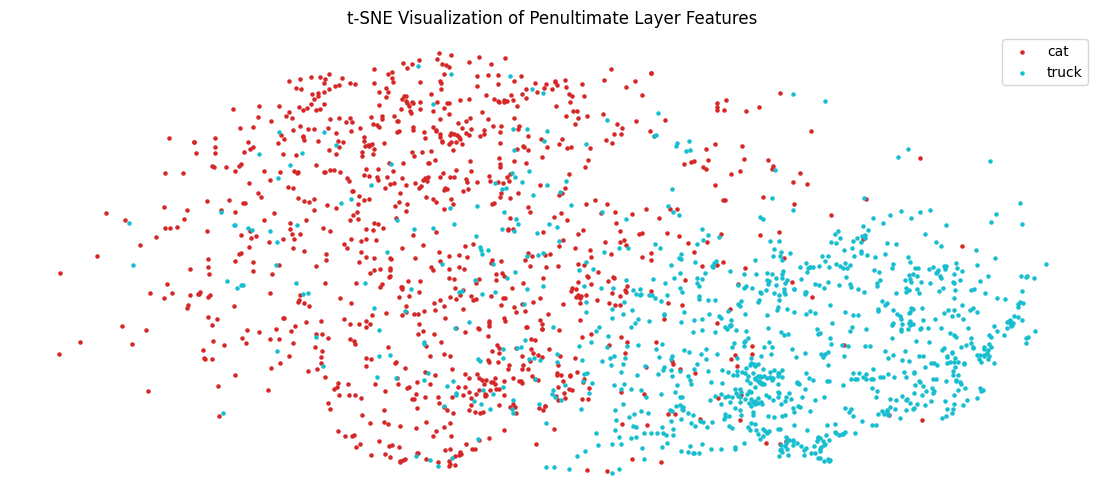

In [146]:
import matplotlib
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

labels_idx = [(k, v) for k, v in cifar10_train.class_to_idx.items()]
class_labels = [x[0] for x in labels_idx]
classes_to_plot = [3, 9]

fig, ax = plt.subplots(figsize=(14, 6))
cmap = matplotlib.cm.get_cmap('tab10', 10)
for c in classes_to_plot:
    mask = (all_labels == c)
    cs = [c] * np.sum(mask)
    ax.scatter(reduced_features[mask, 0], reduced_features[mask, 1], c=cmap(c), label=class_labels[c], s=5)

ax.legend()
plt.title('t-SNE Visualization of Penultimate Layer Features')
plt.grid()
plt.axis("off")
plt.show()

 #### **<u>Exercise</u>**: Try classifying the embedded features
 
 Use the reduced features (or even the full penultimate layers' features) to fit a clustering algorithm and observe its performance w.r.t. different hyperparameters

 - You can use any library (e.g. [sklearn](https://scikit-learn.org/stable/modules/clustering.html), [scipy](https://docs.scipy.org/doc/scipy/reference/cluster.html))
- How to assign, after clustering, the class for each cluster?
- What distance to use when comparing 2 feature vectors?

---
## Speech Command Classification <a class="anchor" id="speech"></a>

In this exercise, we'll classify [Speech Commands](https://arxiv.org/abs/1804.03209), containing 105 829 utterances, from which we'll extract 4 classes:
- "Up"
- "Down"
- "Left"
- "Right"

**Note**: *PyTorch changed the method to handle [backends](https://github.com/facebookresearch/demucs/issues/570) in 2.1.0*, *a torch version of 2.0.1 is recommended for loading the dataset*

In [150]:
!pip show torchaudio

Name: torchaudio
Version: 2.0.2+cu118
Summary: An audio package for PyTorch
Home-page: https://github.com/pytorch/audio
Author: Soumith Chintala, David Pollack, Sean Naren, Peter Goldsborough, Moto Hira, Caroline Chen, Jeff Hwang, Zhaoheng Ni, Xiaohui Zhang
Author-email: soumith@pytorch.org
License: 
Location: /home/opis/vvasiles/.conda/envs/ia2/lib/python3.10/site-packages
Requires: torch
Required-by: 


In [154]:
import torch
import torchaudio
from torchvision.datasets import DatasetFolder
from torch.utils.data import Dataset
import librosa
import os
import numpy as np

dset =  torchaudio.datasets.SPEECHCOMMANDS(root="./torch_data", download=True)
audio_folder = "./data/SpeechCommands/"
classes = ["up", "down", "left", "right"]

Define the maximum number of samples per signal:

In [157]:
sr = 16_000
max_length = 1  # seconds
n_max = int(max_length * sr)

In [158]:
class CustomSpeechDataset(Dataset):
    def __init__(self, root_dir, classes, n_max, transform=None):
        """
        :param root_dir: path to where class folders are
        :param classes: list of strings, corresponding to which classes to keep
        :param n_max: numnber of samples per signal
        """
        super().__init__()
        
        self.root_dir = root_dir
        self.classes = classes
        self.n_max = n_max
        self.file_list = []  # List to store file paths
        self.transform = transform
        self.class_indices = {}

        last_index = 0
        for c in self.classes:
            class_dir = os.path.join(self.root_dir, c)
            files = os.listdir(class_dir)
            self.file_list.extend([os.path.join(class_dir, f) for f in files])
            self.class_indices[c] = list(range(last_index, last_index + len(files))) 

            last_index += len(files)
        
        self.class_to_index = {cls: i for i, cls in enumerate(self.classes)}

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        audio_path = self.file_list[idx]
        waveform, sample_rate = librosa.load(audio_path)

        if len(waveform) < self.n_max:
            # pad with 0s
            waveform = np.concatenate((waveform, [0] * (self.n_max - len(waveform))))
        else:
            waveform = waveform[:self.n_max]
        
        if self.transform:
            waveform = self.transform(waveform)

        label = self.class_to_index[
            os.path.basename(
                os.path.dirname(audio_path)
            )
        ]
        
        return waveform, label

In [163]:
root_dir = "./torch_data/SpeechCommands/speech_commands_v0.02/"
speech_dataset = CustomSpeechDataset(root_dir, classes, n_max)
print(f"#utterances: {len(speech_dataset)}")
print(f"class to index: {speech_dataset.class_to_index}")
print(f"First sample: ", speech_dataset[33])

#utterances: 15219
class to index: {'up': 0, 'down': 1, 'left': 2, 'right': 3}
First sample:  (array([ 6.3608335e-05,  1.6453696e-04,  1.8457466e-04, ...,
       -2.8559164e-04, -1.3467789e-04,  8.6633765e-05], dtype=float32), 0)


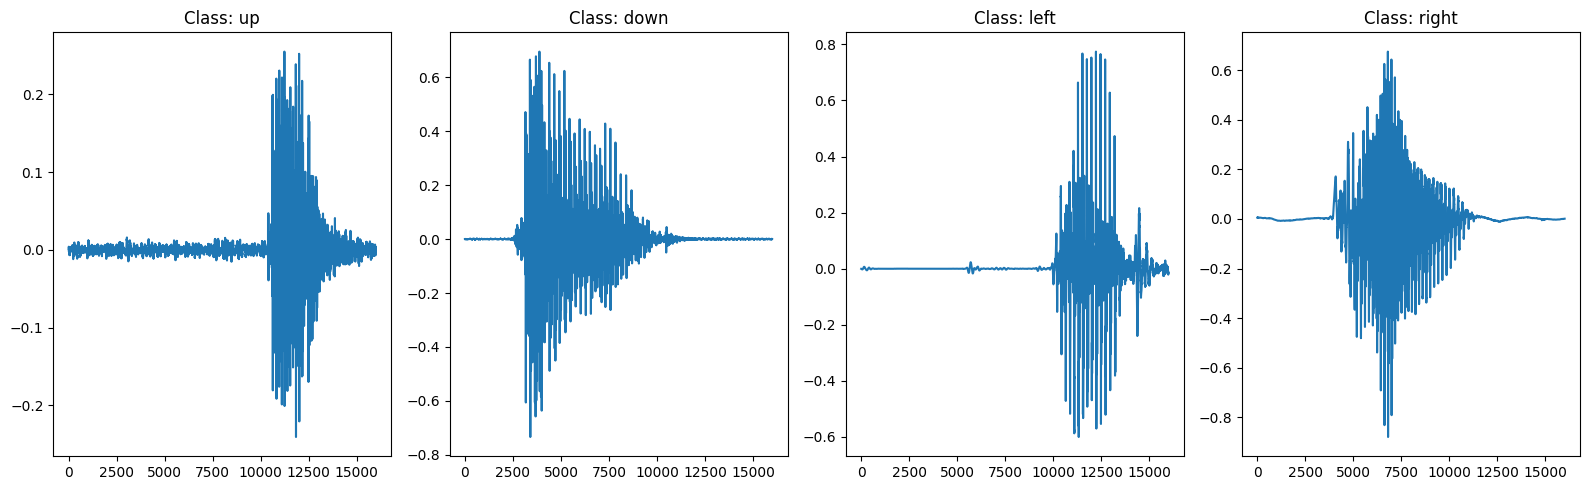

In [165]:
import importlib
import utils
importlib.reload(utils)
from utils import plot_and_listen_random

plot_and_listen_random(speech_dataset, speech_dataset.classes, speech_dataset.class_indices, sr=sr)

### Feature Extraction

We'll use the `transform` attribute of `CustomSpeechDataset` to provide different functionalities to extract features from each loaded utterance. 

In [168]:
class MFCCTransform:
    def __init__(self, sr, 
                n_mfcc=13, 
                hop_length=512, 
                win_length=2048):

        self.sr = sr
        self.n_mfcc = n_mfcc
        self.hop_length = hop_length
        self.win_length = win_length
        
    def __call__(self, waveform):
        mfcc_transform = librosa.feature.mfcc(y=waveform, sr=self.sr, n_mfcc=self.n_mfcc, hop_length=self.hop_length, win_length=self.win_length)
        return mfcc_transform

# Combine multiple transforms into a single feature vector
class MultiFeatureTransform:
    def __init__(self, sr, 
                n_mfcc=None, 
                zcr=True, 
                rms=True,
                frame_length=2048, 
                hop_length=512):

        self.transforms = []
        self.transform_names = []  
        # we'll keep track of what each element from the feature vector represent, for subsequent analysis
        self.feature_ranges = {}  

        if n_mfcc:
            mfcc_transform = MFCCTransform(sr, n_mfcc, hop_length, frame_length)
            self.transforms.append(mfcc_transform)
            self.transform_names.append("mfcc")
        
        if zcr:
            zcr_transform = lambda y: librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)
            self.transforms.append(zcr_transform)
            self.transform_names.append("zcr")
        
        if rms:
            rms_transform = lambda y: librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)
            self.transforms.append(rms_transform)
            self.transform_names.append("rms")

        if ...:
            # any other transform
            ...

    def normalize(self, vector):
        return (vector - vector.mean(dim=1)) / vector.std(dim=1)
    
    def __call__(self, waveform):

        full_feature = None
        
        last_index = 0
        for i, tr in enumerate(self.transforms):
            feature = torch.FloatTensor(tr(waveform))
            feature = feature.view(1, -1)
            feature = self.normalize(feature)
            
            self.feature_ranges[self.transform_names[i]] = (last_index, last_index + feature.shape[1])
            last_index += feature.shape[1]

            if full_feature is not None:
                full_feature = torch.cat((full_feature, feature), dim=1)
            else:
                full_feature = feature

        return full_feature.squeeze()
            

Try adding other features from [here](https://librosa.org/doc/latest/feature.html#spectral-features).

In [219]:
n_mfcc = 7
zcr=False
rms=False
window_size = 25e-3 # seconds
hop_size = 10e-3 # seconds"

window_length = int(sr * window_size)
hop_length = int(sr * hop_size)

print("Window of analysis: ", window_length)
print("Stride of analysis: ", hop_length)

transform = MultiFeatureTransform(sr=sr, 
                                  n_mfcc=n_mfcc,
                                  zcr=zcr,
                                  rms=rms, 
                                  frame_length=window_length,
                                  hop_length=hop_length)

speech_dataset_features = CustomSpeechDataset(root_dir, classes, n_max, transform=transform)

Window of analysis:  400
Stride of analysis:  160


In [220]:
from time import time

t0 = time()
sample, label = speech_dataset_features[11]
t1 = time()

print("Time to retrieve 1 sample: ", t1 - t0)
print("First sample size & label: ", sample.shape, label)
print("Feature names: ", transform.transform_names)
print("Feature ranges: ", transform.feature_ranges)

Time to retrieve 1 sample:  0.015030384063720703
First sample size & label:  torch.Size([707]) 0
Feature names:  ['mfcc']
Feature ranges:  {'mfcc': (0, 707)}


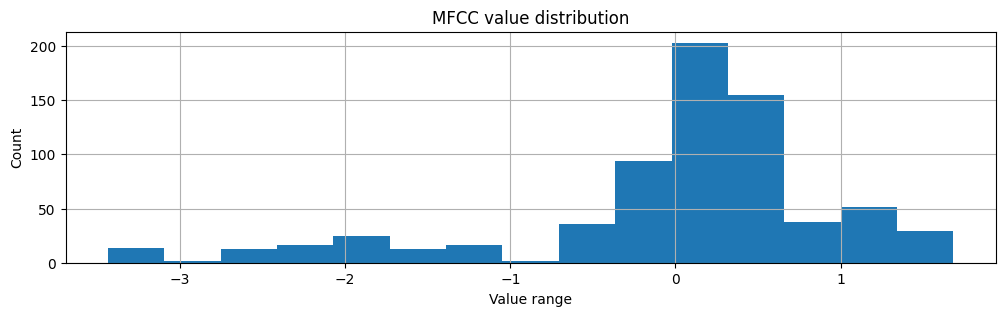

In [221]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, len(transform.transform_names), figsize=(12, 3))
if not isinstance(ax, list):
    ax = [ax]
for i, (tr, rng) in enumerate(transform.feature_ranges.items()):
    ax[i].hist(sample[rng[0]: rng[1]].view(-1).numpy(), bins=15)
    ax[i].set_title(f"{tr.upper()} value distribution")
plt.grid()
plt.xlabel("Value range")
plt.ylabel("Count")
plt.show()

### Data Splitting & Classifier Training

In [235]:
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import Subset, DataLoader
from tqdm import tqdm

### i.e. how much of the entire dataset we'll use for train and test
test_size = 0.01
train_size = 0.4

stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, train_size=train_size, random_state=33)

targets = [speech_dataset_features.class_to_index[os.path.basename(os.path.dirname(file_path))] for file_path in speech_dataset_features.file_list]
train_idx, test_idx = next(stratified_splitter.split(speech_dataset_features.file_list, targets))

train_dataset_speech = Subset(speech_dataset_features, train_idx)
test_dataset_speech = Subset(speech_dataset_features, test_idx)

print("Train Dataset size: ", len(train_dataset_speech))
print("Test Dataset size: ", len(test_dataset_speech))

Train Dataset size:  6087
Test Dataset size:  153


153it [00:02, 66.25it/s]


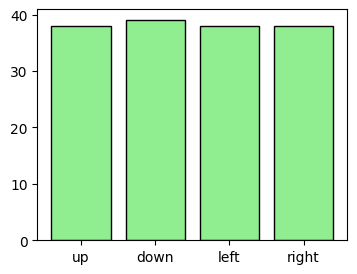

In [236]:
labels_test = [0 for _ in range(len(classes))]
for i, (sample, label) in tqdm(enumerate(test_dataset_speech)):
    labels_test[label] += 1

    if i == 500:
        break

plt.figure(figsize=(4, 3))
plt.bar([i for i in range(len(classes))], labels_test, color='lightgreen', ec='black')
plt.xticks([i for i in range(len(classes))], labels=classes)
plt.show()

Hyperparameters:

In [237]:
### Training
batch_size = 512
lr = 1e-3
epochs = 5
print_frequency = 1

if torch.cuda.is_available():
    device = torch.device('cuda')
    torch.cuda.empty_cache() 
else:
    device = torch.device('cpu')
print(f"Using {device}.")

Using cpu.


In [238]:
train_loader_speech = DataLoader(train_dataset_speech, batch_size=batch_size, shuffle=True)
test_loader_speech = DataLoader(test_dataset_speech, batch_size=batch_size, shuffle=False)

print(len(train_loader_speech), len(test_loader_speech))

12 1


In [239]:
### Model
input_size = sample.shape[0]
output_size = len(classes)
hidden_sizes = [256, 128, 32]
activation_fn = torch.nn.ReLU()

model = GenericFCNN(input_size, output_size, hidden_sizes, activation_fn, input_flatten=False)

In [240]:
from torchsummary import summary

summary(model, (input_size,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
          Identity-1                  [-1, 707]               0
            Linear-2                  [-1, 256]         181,248
              ReLU-3                  [-1, 256]               0
              ReLU-4                  [-1, 256]               0
            Linear-5                  [-1, 128]          32,896
              ReLU-6                  [-1, 128]               0
              ReLU-7                  [-1, 128]               0
            Linear-8                   [-1, 32]           4,128
              ReLU-9                   [-1, 32]               0
             ReLU-10                   [-1, 32]               0
           Linear-11                    [-1, 4]             132
Total params: 218,404
Trainable params: 218,404
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [241]:
best_loss = torch.inf

train_losses = []
test_losses = []

model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path = "models/speech"
file_name = "model.pth"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for e in tqdm(range(1, epochs + 1)):
    train_loss, train_acc = step(model, train_loader_speech, optimizer, loss, device=device)
    test_loss, test_acc = step(model, test_loader_speech, optimizer, loss, is_training=False, device=device)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss

        checkpoint = {'state_dict': model.state_dict(),'optimizer' :optimizer.state_dict()}
        torch.save(checkpoint, os.path.join(folder_path, file_name))
    
    if e % print_frequency == 0:
        print(f"Epoch {e}/{epochs}: train_loss={train_loss} train_acc={train_acc} test_loss={test_loss} test_acc={test_acc}")

  0%|          | 0/12 [00:00<?, ?it/s]

 20%|██        | 1/5 [01:31<06:06, 91.56s/it]

Epoch 1/5: train_loss=1.3655638198057811 train_acc=0.32971907343518975 test_loss=1.3477076292037964 test_acc=0.33986928104575165


 40%|████      | 2/5 [03:02<04:33, 91.28s/it]

Epoch 2/5: train_loss=1.281571626663208 train_acc=0.43354690323640543 test_loss=1.2890113592147827 test_acc=0.41830065359477125


 60%|██████    | 3/5 [04:33<03:02, 91.30s/it]

Epoch 3/5: train_loss=1.1848493317763011 train_acc=0.5005749958928865 test_loss=1.1914498805999756 test_acc=0.5359477124183006


 80%|████████  | 4/5 [06:05<01:31, 91.20s/it]

Epoch 4/5: train_loss=1.1051106055577595 train_acc=0.5391818629866929 test_loss=1.1375925540924072 test_acc=0.5294117647058824


100%|██████████| 5/5 [07:36<00:00, 91.21s/it]

Epoch 5/5: train_loss=1.04520645737648 train_acc=0.5730244783965829 test_loss=1.076561450958252 test_acc=0.5686274509803921


### Visualizing Feature Sensitivity (Optional)

[**Gradient-weighted Class Activation 
Mapping (Grad-CAM**](https://openaccess.thecvf.com/content_ICCV_2017/papers/Selvaraju_Grad-CAM_Visual_Explanations_ICCV_2017_paper.pdf) is a technique used for visualizing and understanding the decisions made by a neural network, particularly in the context of image classification tasks. It helps highlight the regions of an input that are important for a deep neural network's prediction. 

Up until now, we've automatically computed gradients of the loss w.r.t. the network weights. In order to visualize which parts of input have a higher effect on the output, we'll compute the gradients w.r.t. to each element in the input data. We'll use a simpler variant of GradCAM to construct a heatmap over the input MFCCs to our classification model.

In [246]:
from torch.autograd import Function


def generate_grad_cam(model, input_data, label, device):
    """
    Computes the gradients of the loss w.r.t. to input_data, given a trained model and a target label.
    """
    input_data.requires_grad = True
    
    # Forward pass
    output = model(input_data.unsqueeze(0))
    target = torch.tensor([label]).to(device)
    
    # Backward pass to calculate gradients
    loss = nn.CrossEntropyLoss()(output, target)
    loss.backward()
    
    # Calculate importance weights (Gradients x Input Features)
    grad_cam_map = input_data.grad.squeeze().detach().cpu().numpy()
    
    return grad_cam_map

def plot_grad_cam_line(input_data, grad_cam_map):
    fig, ax1 = plt.subplots(figsize=(12, 3))
    
    color = 'tab:blue'
    ax1.set_xlabel('Feature index')
    ax1.set_ylabel('Feature Value', color=color)
    ax1.plot(input_data.detach().numpy(), color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:red'
    ax2.set_ylabel('Feature sensitivity', color=color)  # we already handled the x-label with ax1
    ax2.plot(grad_cam_map, color=color, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

def plot_grad_cam_heatmap(input_data, grad_cam_map, n_mfcc):

    n_frames = int(input_data.shape[0]) // n_mfcc
    
    mfcc = np.reshape(input_data.detach().numpy(), (n_mfcc, n_frames))
    heatmap = np.reshape(grad_cam_map, (n_mfcc, n_frames))

    plt.figure(figsize=(15, 6))
    plt.subplot(2, 1, 1)
    plt.imshow(np.flip(mfcc, axis=(0, 1)), cmap="winter")
    plt.yticks([i for i in range(n_mfcc)], labels=[n_mfcc - i for i in range(n_mfcc)])
    plt.title("Normalized MFCC coefficients")
    plt.colorbar(location="bottom", shrink=0.2)
    plt.subplot(2, 1, 2)
    plt.imshow(np.flip(heatmap, axis=(0, 1)), cmap="seismic")
    plt.yticks([i for i in range(n_mfcc)], labels=[n_mfcc - i for i in range(n_mfcc)])
    plt.title("GradCAM Heatmap")
    plt.colorbar(location="bottom", shrink=0.2)
    

							 Target: up Predicted: up


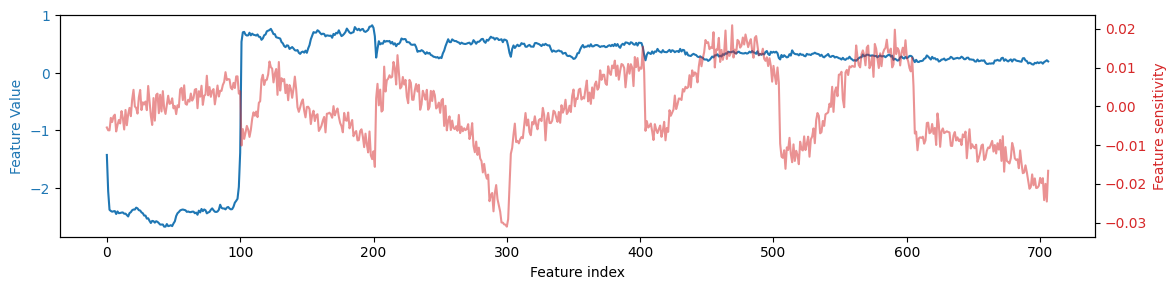

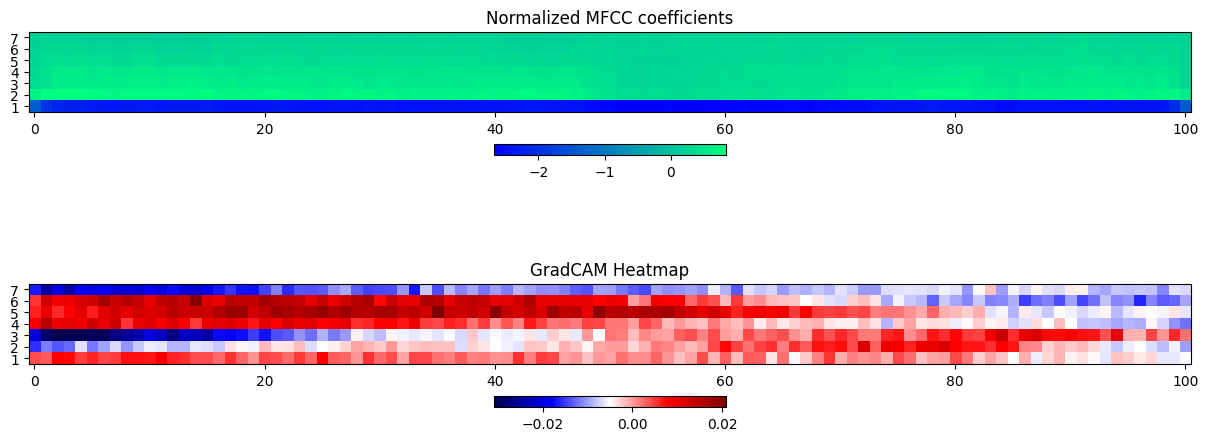

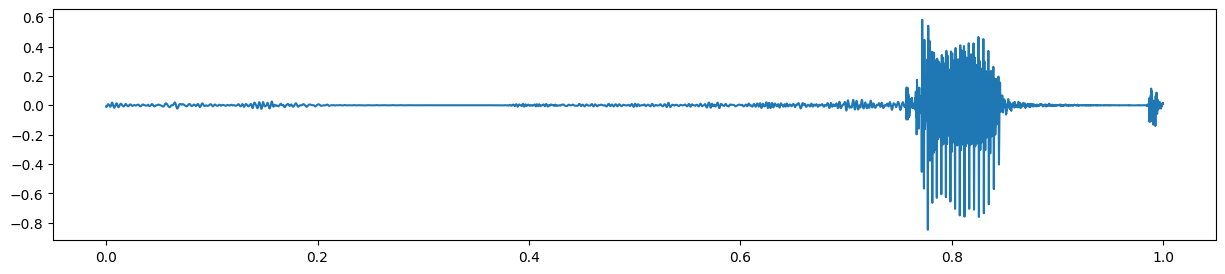

In [248]:
from IPython.display import Audio

i = 68

idx_in_bigger = test_dataset_speech.indices[i]
class_to_index = test_dataset_speech.dataset.class_to_index
index_to_class = {v:k for k, v in class_to_index.items()}

mfcc_range = transform.feature_ranges["mfcc"]
idx_start, idx_stop = mfcc_range

sample, label = test_dataset_speech[i]
wav_file = test_dataset_speech.dataset.file_list[idx_in_bigger]
signal, sr = librosa.load(wav_file)

predicted = classes[torch.argmax(model.cpu()(sample))]
target = index_to_class[label]

print(f"\t\t\t\t\t\t\t Target: {target} Predicted: {predicted}")

grad_cam_map = generate_grad_cam(model.to(device), sample.to(device), label, device)

plot_grad_cam_line(sample[idx_start: idx_stop], grad_cam_map[idx_start: idx_stop])
plot_grad_cam_heatmap(sample[idx_start: idx_stop], grad_cam_map[idx_start: idx_stop], n_mfcc=n_mfcc)

plt.figure(figsize=(15, 3))
plt.plot([i / sr for i in range(len(signal))], signal)

Audio(signal, rate=sr)

You can try other feature sensitivity analysis tools: [SHAP (SHapley Additive exPlanations)](https://shap.readthedocs.io/en/latest/generated/shap.Explainer.html)

---
---
## Homework 🔬

Analyse the influence of network **depth** and **width** of a fully-connected neural network trained for the previous speech command classification task.

Steps:

1. Define your neural network class, which should be customizable in terms of depth and width. Activations can be fixed.
2. Define your ablation studies - e.g. training with increasing depth from $x$ to $y$ while keeping width fixed at $z$
3. Present your results in the form of graphs, showing the train & test performance (y-axis) vs. the variables changed during experiments (x-axis).

❗ Discuss your results by refering to the *Bias–variance tradeoff* dilemma.

Relevant references:
- [Towards Understanding the Role of Over-Parametrization
in Generalization of Neural Networks](https://arxiv.org/pdf/1805.12076)
- [A Modern Take on the Bias-Variance Tradeoff
in Neural Networks](https://arxiv.org/pdf/1810.08591)

---
---